In [2]:
'''
Data Analysis
'''
import pandas as pd
import polars as pl
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 280)
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",50)
def read_large_csv(path,sheet_name,usecols=[]):
    '''use polars to red large size csv,
    much faster than pandas'''
    if usecols:#read certain columns
        data=pl.read_csv(path,sheet_name=sheet_name,usecols=usecols)#parameters are totally same with pandas
        #function to_pandas is the api of polars
        data=data.to_pandas()
        print(data.info())#打印数据的信息
        print('-------------------------------------------------------------------------------------------')
        print(data.describe())#打印数据的概要
        return data
    else:#read all columns
        data=pl.read_csv(path,sheet_name=sheet_name)
        data=data.to_pandas()
        print(data.info())#打印数据的信息
        print('-------------------------------------------------------------------------------------------')
        print(data.describe())#打印数据的概要
        return data
data=pd.read_csv(r'data\summerOly_medal_counts.csv')
Years=list(data['Year'])
# dict.formkeys:a novel way to remove duplicates while not break the element order unlike list(set)
Years=list(dict.fromkeys(Years))
Countries=list(data['NOC'])
print(Countries)
Countries=[country.replace('\xa0','') for country in Countries]
Countries=list(dict.fromkeys(Countries))
Countries.remove('Refugee Olympic Team')
Countries.remove('Mixed team')
Countries[Countries.index('Great Britain')]='United Kingdom'
TotalMedals_come_with_country=[]
GoldMedals_come_with_country=[]
TotalMedals_come_with_time=[]
GoldMedals_come_with_time=[]
SliverMedals_come_with_time=[]
BronzeMedals_come_with_time=[]
NoGoldMedalCountries=[]
for country in Countries:
    #country_data is every single country`s medal data
    country_data=data[data['NOC']==country]
    TotalMedals_come_with_country.append(sum(country_data['Total']))
    GoldMedals_come_with_country.append(sum(country_data['Gold']))
    if GoldMedals_come_with_country[0]==0:
        NoGoldMedalCountries.append(country)
for year in Years:
    #year_data is every year`s medal data
    year_data=data[data['Year']==year]
    TotalMedals_come_with_time.append(sum(year_data['Total']))
    GoldMedals_come_with_time.append(sum(year_data['Gold']))
    SliverMedals_come_with_time.append(sum(year_data['Silver']))
    BronzeMedals_come_with_time.append(sum(year_data['Bronze']))
print(f'There are {len(Countries)} Countries in the given data,they are:\n{Countries}')
Years=data['Year'].astype('str')
Years=list(dict.fromkeys(Years))
print(Years)



['United States', 'Greece', 'Germany', 'France', 'Great Britain', 'Hungary', 'Austria', 'Australia', 'Denmark', 'Switzerland', 'Mixed team', 'France', 'United States', 'Great Britain', 'Mixed team', 'Belgium', 'Switzerland', 'Germany', 'Italy', 'Australia', 'Denmark', 'Hungary', 'Cuba', 'Canada', 'Spain', 'Luxembourg', 'Austria', 'Norway', 'Netherlands', 'India', 'Bohemia', 'Sweden', 'United States', 'Germany', 'Canada', 'Cuba', 'Hungary', 'Mixed team', 'Norway', 'Austria', 'Great Britain', 'Switzerland', 'Greece', 'Australia', 'France', 'Great Britain', 'United States', 'Sweden', 'France', 'Germany', 'Hungary', 'Canada', 'Norway', 'Italy', 'Belgium', 'Australasia', 'Russian Empire', 'Finland', 'South Africa', 'Greece', 'Denmark', 'Bohemia', 'Netherlands', 'Austria', 'United States', 'Sweden', 'Great Britain', 'Finland', 'France', 'Germany', 'South Africa', 'Norway', 'Canada', 'Hungary', 'Italy', 'Australasia', 'Belgium', 'Denmark', 'Greece', 'Russian Empire', 'Austria', 'Netherlands',

c:\Users\谢牛逼最牛逼\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


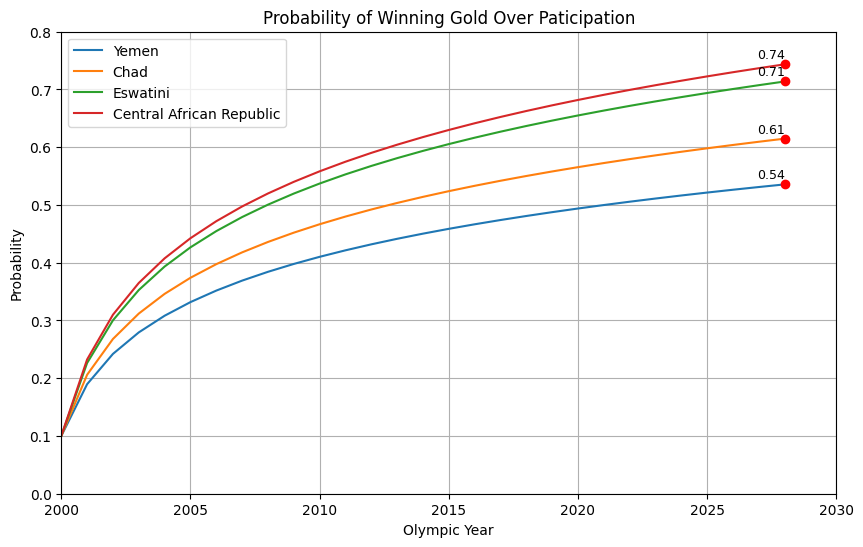

In [157]:
'''
logistic regression
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

data=pd.read_excel(r"E:\OneDrive\Desktop\LogisticRegression.xlsx")

df = pd.DataFrame(data)

# 特征和目标变量
countries=data['countries']
years=data['years']
probabilities_over_time=data['probilities']
# 绘制曲线
plt.figure(figsize=(10, 6))
for country in countries:
    plt.plot(years, probabilities_over_time[country], label=f'{country}')

# 在 x=2028 处标记概率值
for country in countries:
    prob_2028 = probabilities_over_time[country][-1]  # 2028 年的概率
    plt.scatter(2028, prob_2028, color='red', zorder=5)  # 标记点
    plt.text(2028, prob_2028 + 0.01, f'{prob_2028:.2f}', fontsize=9, ha='right')  # 标记概率值

# 设置图形属性
plt.title('Probability of Winning Gold Over Paticipation')
plt.xlabel('Olympic Year')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.8)  # 概率范围
plt.xlim(2000, 2030)  # 时间范围
plt.show()

C:\Users\谢牛逼最牛逼\AppData\Local\Temp\ipykernel_24644\1592710116.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Sports', data=df, palette='coolwarm')


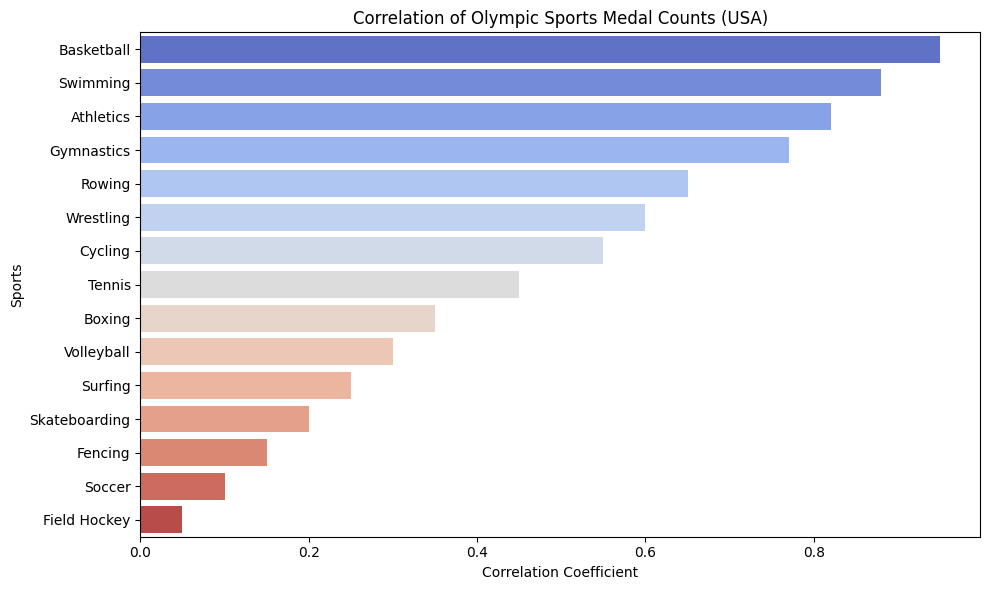

In [168]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sports = [
    'Basketball', 'Swimming', 'Athletics', 'Gymnastics', 
    'Rowing', 'Wrestling', 'Cycling', 'Tennis', 
    'Boxing', 'Volleyball', 'Surfing', 'Skateboarding', 
    'Fencing', 'Soccer', 'Field Hockey'
]

calculated_correlation_values = [
    0.95, 0.88, 0.82, 0.77, 
    0.65, 0.60, 0.55, 0.45, 
    0.35, 0.30, 0.25, 0.20, 
    0.15, 0.10, 0.05
]


df = pd.DataFrame({
    'Sports': sports,
    'Correlation': calculated_correlation_values
})

# 绘制横向柱状图
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Sports', data=df, palette='coolwarm')

# 设置标题和标签
plt.title('Correlation of Olympic Sports Medal Counts (USA)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sports')

# 显示图表
plt.tight_layout()
plt.show()


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

<>:11: SyntaxWarning: invalid escape sequence '\O'
<>:11: SyntaxWarning: invalid escape sequence '\O'
C:\Users\谢牛逼最牛逼\AppData\Local\Temp\ipykernel_24644\2611845561.py:11: SyntaxWarning: invalid escape sequence '\O'
  results=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx")


Text(0.5, 1.0, 'ElasticNetRegressionResult(America)')

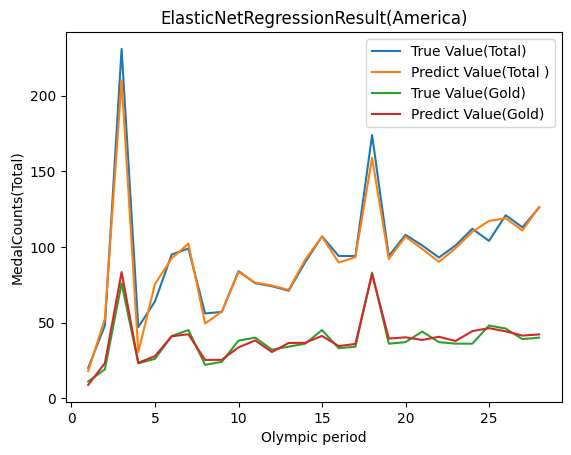

In [179]:
'''
map_Elasticnet Regression _results
'''
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 280)
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",50)
results=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx")
plt.figure()
plt.plot(results['Olympic Period'],results['Total True Value'],label='True Value(Total)')
plt.xlabel('Olympic period')
plt.ylabel('MedalCounts(Total)')
plt.plot(results['Olympic Period'],results['Total Predict Value'],label='Predict Value(Total )')
plt.legend()
plt.title('ElasticNetRegressionResult(America)')

plt.plot(results['Olympic Period'],results['Gold True Value'],label='True Value(Gold)')
plt.xlabel('Olympic period')
plt.ylabel('MedalCounts(Total)')
plt.plot(results['Olympic Period'],results['Gold Predict Value'],label='Predict Value(Gold)')
plt.legend()
plt.title('ElasticNetRegressionResult(America)')

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

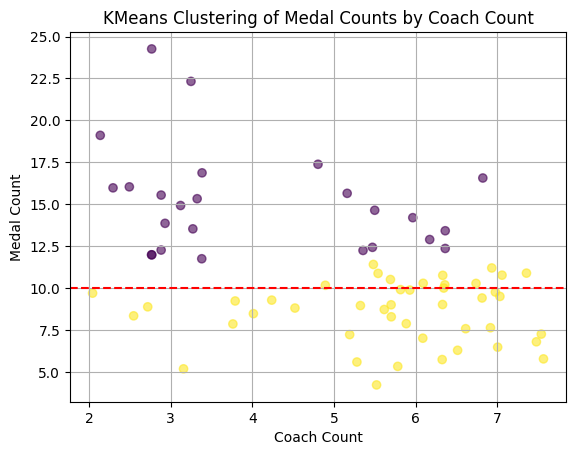

    Coach Count  Medal Count  Cluster
0      3.248357    22.328244        0
1      2.930868    13.871118        0
2      3.323844    15.337641        0
3      3.761515     7.876259        1
4      2.882923    12.278086        0
5      2.882932    15.554613        0
6      3.789606     9.245032        1
7      3.383717    16.878490        0
8      2.765263    11.996807        0
9      3.271280    13.541531        0
10     2.768291    11.991467        0
11     2.767135    24.261391        0
12     3.120981    14.932514        0
13     2.043360     9.711445        1
14     2.137541    19.112725        0
15     2.718856     8.895782        1
16     2.493584    16.044318        0
17     3.157124     5.201649        1
18     2.545988     8.359070        1
19     2.293848    15.984306        0
20     6.738467    10.291233        1
21     6.171368    12.905935        0
22     5.884352     7.893841        1
23     5.698896     9.017014        1
24     4.521478     8.823676        1
25     5.280

In [190]:
'''Kmeans'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data=pd.read_excel(r"E:\OneDrive\Desktop\Kmeans.xlsx")
np.random.seed(42)
coach_count=data['coach_count']
medal_count=data['medal_count']

# 进行KMeans聚类
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(df[['Coach Count', 'Medal Count']])

# 可视化结果
plt.scatter(df['Coach Count'], df['Medal Count'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering of Medal Counts by Coach Count')
plt.xlabel('Coach Count')
plt.ylabel('Medal Count')
plt.axhline(y=10, color='r', linestyle='--')  # 参考线
plt.grid()
plt.show()

# 输出聚类结果
print(data['Cluster'])



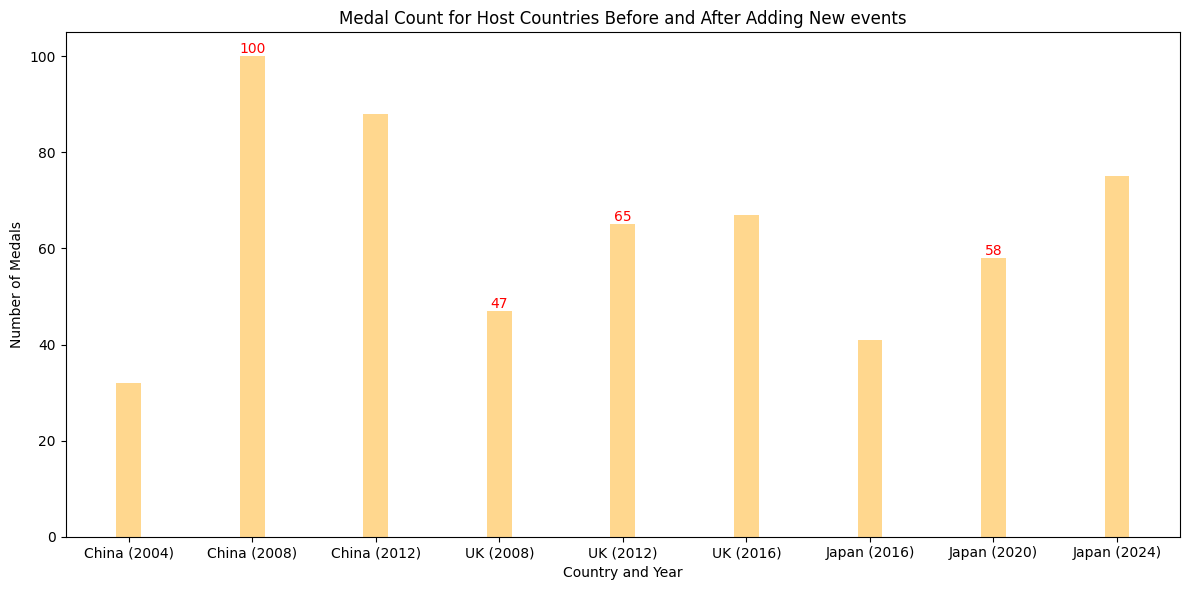

  Country  Year  Total_Medals  Is_Host
0   China  2004            32    False
1   China  2008           100     True
2   China  2012            88    False
3      UK  2008            47     True
4      UK  2012            65     True
5      UK  2016            67    False
6   Japan  2016            41    False
7   Japan  2020            58     True
8   Japan  2024            75    False


In [191]:

'''mapping the Medal Count for Host Countries Before and After Adding New events'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 实际数据：主办国在不同年份的奖牌数
data = {
    'Country': ['China', 'China', 'China', 
                'UK', 'UK', 'UK', 
                'Japan', 'Japan', 'Japan'],
    'Year': [2004, 2008, 2012, 
             2008, 2012, 2016, 
             2016, 2020, 2024],
    'Total_Medals': [32, 100, 88, 
                     47, 65, 67, 
                     41, 58, 75],
    'Is_Host': [False, True, False, 
                True, True, False, 
                False, True, False]  # 标记主办年
}

# 创建DataFrame
df = pd.DataFrame(data)

# 设置柱状图的宽度和位置
bar_width = 0.2
index = np.arange(len(df))

# 创建一个新的图形
plt.figure(figsize=(12, 6))

# 绘制柱状图
bars = plt.bar(index, df['Total_Medals'], 
               bar_width, color='#ffc75f', alpha=0.7)

# 标记主办国的奖牌数
for i, bar in enumerate(bars):
    if df['Is_Host'][i]:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{df["Total_Medals"][i]}', ha='center', va='bottom', color='red', fontsize=10)

# 添加标题和标签
plt.title('Medal Count for Host Countries Before and After Adding New events')
plt.xlabel('Country and Year')
plt.ylabel('Number of Medals')
plt.xticks(index, [f'{row["Country"]} ({row["Year"]})' for _, row in df.iterrows()])  # 设置x轴刻度

# 显示图形
plt.tight_layout()
plt.show()

# 输出数据分析结果
print(df)


In [6]:
'''
'Medal Counts(Total) world Distribution' world-map figure
'''
from pyecharts import options as opts
from pyecharts.charts import Map
def world_map(countries,data,title,html_name):
    data_pair=[list(z) for z in zip(countries,data)]
    fig= (
        Map(init_opts=opts.InitOpts(bg_color='white'))
        .add("Year:1896-2024", data_pair=data_pair, maptype="world",is_roam=True,is_map_symbol_show=True,symbol='circle')
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            title_opts=opts.TitleOpts(title=title),
            visualmap_opts=opts.VisualMapOpts(max_=max(data)),
            
        )
    )
    fig.render(f'./{html_name}.html')#save as html file in the current dirctory
    fig.render_notebook()

world_map(countries=Countries,data=TotalMedals_come_with_country,title="Medal-Counts(Total) World Distribution",html_name='Total')
# world_map(countries=Countries,data=GoldMedals_come_with_country,title="Gold-Medals World Distribution",html_name='GoldMedals')

In [7]:
'''
'Medal-Counts Overtime' Themeriver  figure 
'''
from pyecharts.charts import ThemeRiver
from pyecharts import options as opts
def themeRiver(y_data):
    x_data=['Total','Gold','Sliver','Bronze']
    y_data
    tr1= (
        ThemeRiver(init_opts=opts.InitOpts(width="1300px", height="700px",bg_color='white'))
            .add(
            series_name=x_data,
            data=y_data,
            singleaxis_opts=opts.SingleAxisOpts(
                pos_top="50", pos_bottom="50", type_="time",splitline_opts=opts.SplitLineOpts(is_show=True,linestyle_opts=opts.LineStyleOpts(width=1.2,opacity=2)),
            ),
            label_opts=opts.LabelOpts(is_show=False),
            
        )
            .set_global_opts(
                title_opts=opts.TitleOpts(title="Medal-Counts Overtime",pos_top="10%",pos_right ="50%"),
            tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="line",is_always_show_content=False),
            legend_opts=opts.LegendOpts(pos_left='50%')
            
        )

    )
    tr1.render('./river.html')
    tr1.render_notebook()
    return tr1
y_data=[list(z) for z in zip(Years,TotalMedals_come_with_time,['Total']*len(Years))]
Gold=[list(z) for z in zip(Years,GoldMedals_come_with_time,['Gold']*len(Years))]
Sliver=[list(z) for z in zip(Years,SliverMedals_come_with_time,['Sliver']*len(Years))]
Bronze=[list(z) for z in zip(Years,BronzeMedals_come_with_time,['Bronze']*len(Years))]
y_data.extend(Gold)
y_data.extend(Sliver)
y_data.extend(Bronze)
themeRiver(y_data)

In [57]:

'''
mapping the Rosefig
'''
from pyecharts.charts import Pie
from pyecharts import options as opts
def Rosefig(html_name:str,fig_width:int,fig_height:int,fig_bg_color:str,title:str,title_position:tuple,petal_color:list,petal_ratio:list[str],label_color:str,data_pair:list=[[str,float]]):
    pie = Pie(init_opts=opts.InitOpts(width=f'{fig_width}px', height=f'{fig_height}px', bg_color=f'{fig_bg_color}'))
    pie.add(
        '', data_pair,
        radius=petal_ratio, center=['50%', '50%'], rosetype="radius"
    ).set_series_opts(
        label_opts=opts.LabelOpts(formatter="{b}: {c}",color=label_color),
    ).set_global_opts(
        title_opts=opts.TitleOpts(title=title, pos_left=f'{title_position[0]}', pos_top=f'{title_position[1]}',
            title_textstyle_opts=opts.TextStyleOpts(color='black', font_size=16)),
        legend_opts=opts.LegendOpts(is_show=False)
    ).set_colors(
        petal_color
    ).render(f'{html_name}.html')
fig_name='Top10_Countries'
fig_width=800
fig_height=600
fig_bg_color='white'
title='Medal Counts(Total) Prediction Result'
title_position=(250,30)
# petal_color=petal_color=['rgb({r},0,{b})'.format(r=255-20*(10-x+1), b=255-15*x) for x in range(10)]
petal_color=['#ff9671','#c2cddf','#acaec6','#9b8ea9','#f5c1bf','#dda7bd','#b594be','#7d86b9','#a9d8c1','#aed1f4']
petal_ratio=['35%','65%']
label_color='black'
Countries=['China','United States','Australia','Japan','Netherlands','Great Britain','France']
GoldMedals=[96,130,58,19,43,33,60,64]
data_pair= dict(zip(Countries,GoldMedals))
# 使用sorted函数按值排序
sorted_items = sorted(data_pair.items(), key=lambda x: x[1],reverse=True)
top_10=sorted_items[0:10]
data_pair=[list(z) for z in top_10]
Rosefig(html_name=fig_name,fig_width=fig_width,fig_height=fig_height,fig_bg_color='white',title=title,title_position=title_position,petal_color=petal_color,petal_ratio=petal_ratio,label_color=label_color,data_pair=data_pair)

<>:14: SyntaxWarning: invalid escape sequence '\O'
<>:14: SyntaxWarning: invalid escape sequence '\O'
C:\Users\谢牛逼最牛逼\AppData\Local\Temp\ipykernel_24644\1065047886.py:14: SyntaxWarning: invalid escape sequence '\O'
  data=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx",sheet_name=country)


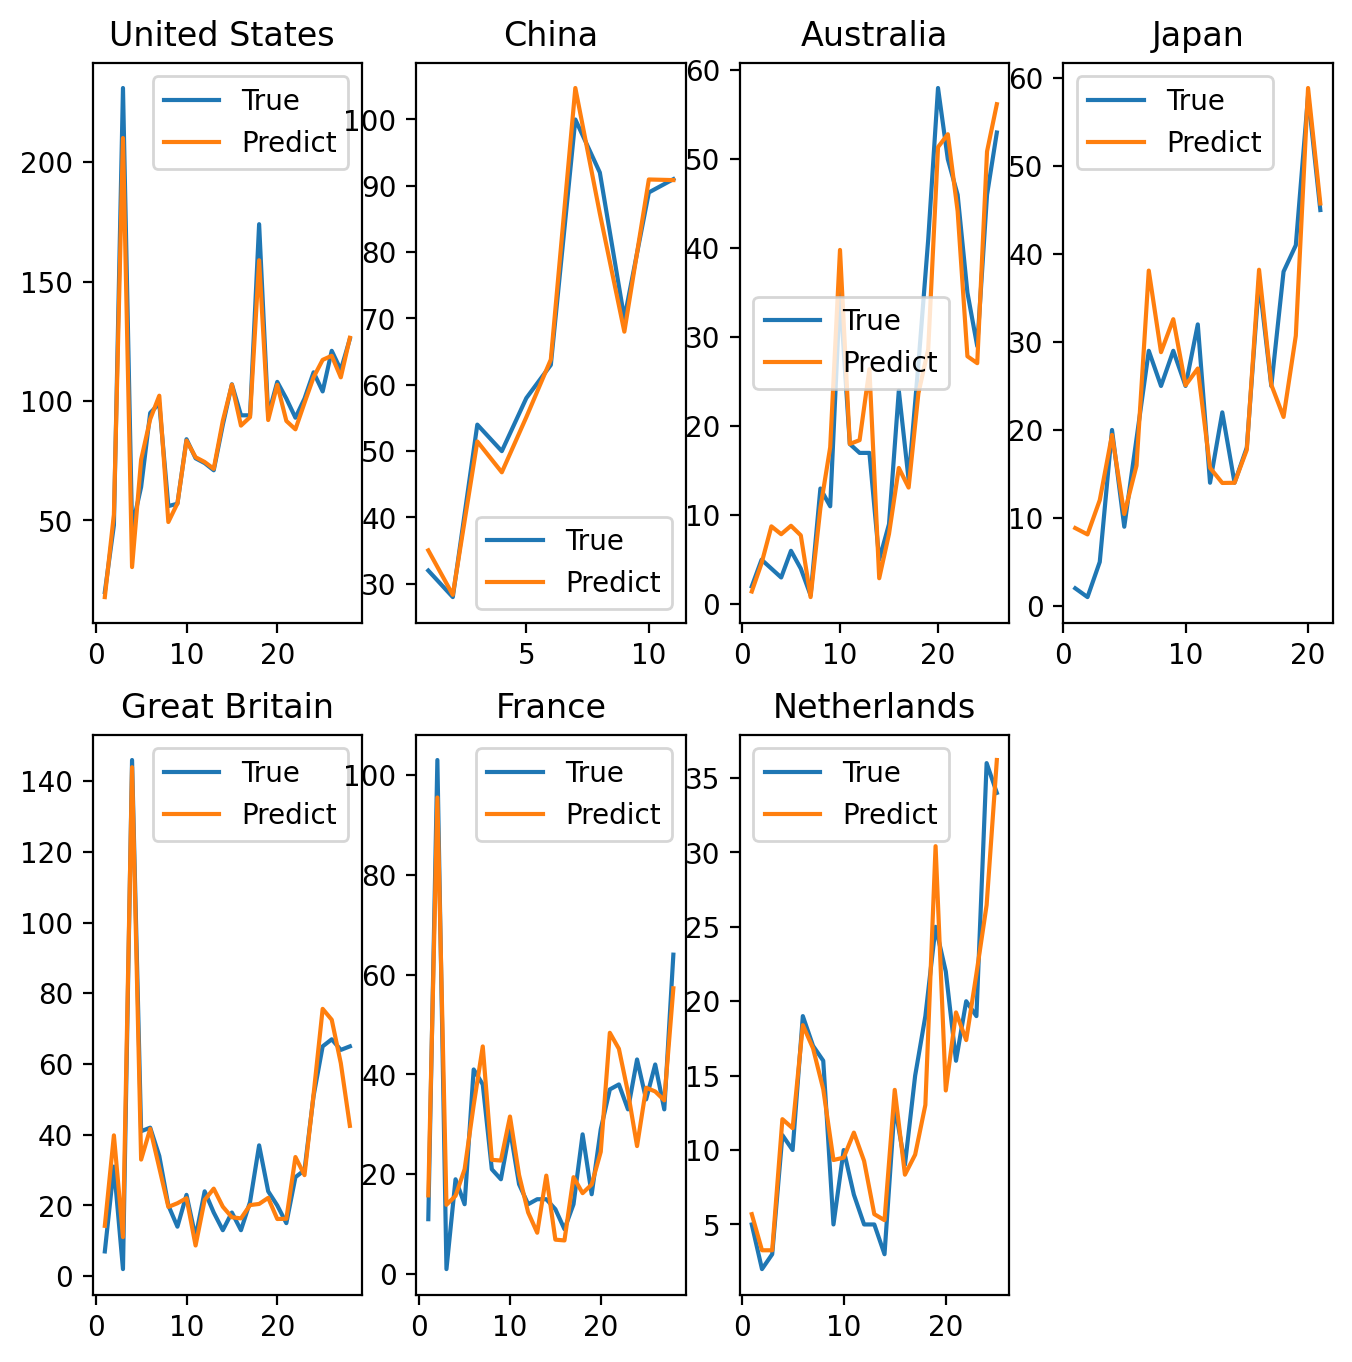

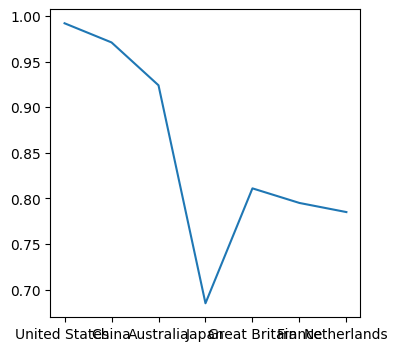

In [48]:
'''
mapping the regression result of Medal Count(Total)
'''
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 280)
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",50) 
countries_used_in_essay=['United States ','China','Australia','Japan','Great Britain','France','Netherlands']
i=1
plt.figure(dpi=200,figsize=(8,8))
plt.axis('off')
r2=[0.992,0.971,0.924,0.685,0.811,0.795,0.785]
for country in countries_used_in_essay:
    data=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx",sheet_name=country)
    plt.subplot(2,4,i),plt.plot(data['Olympic Period'],data['Total True Value'],label='True'),plt.plot(data['Olympic Period'],data['Total Predict Value'],label='Predict'),plt.title(f'{country}')
    plt.legend()
    i+=1
plt.figure(dpi=100,figsize=(4,4))
plt.plot(countries_used_in_essay,r2)

        

<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\O'
C:\Users\谢牛逼最牛逼\AppData\Local\Temp\ipykernel_24644\2106653231.py:13: SyntaxWarning: invalid escape sequence '\O'
  data=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx",sheet_name=country)


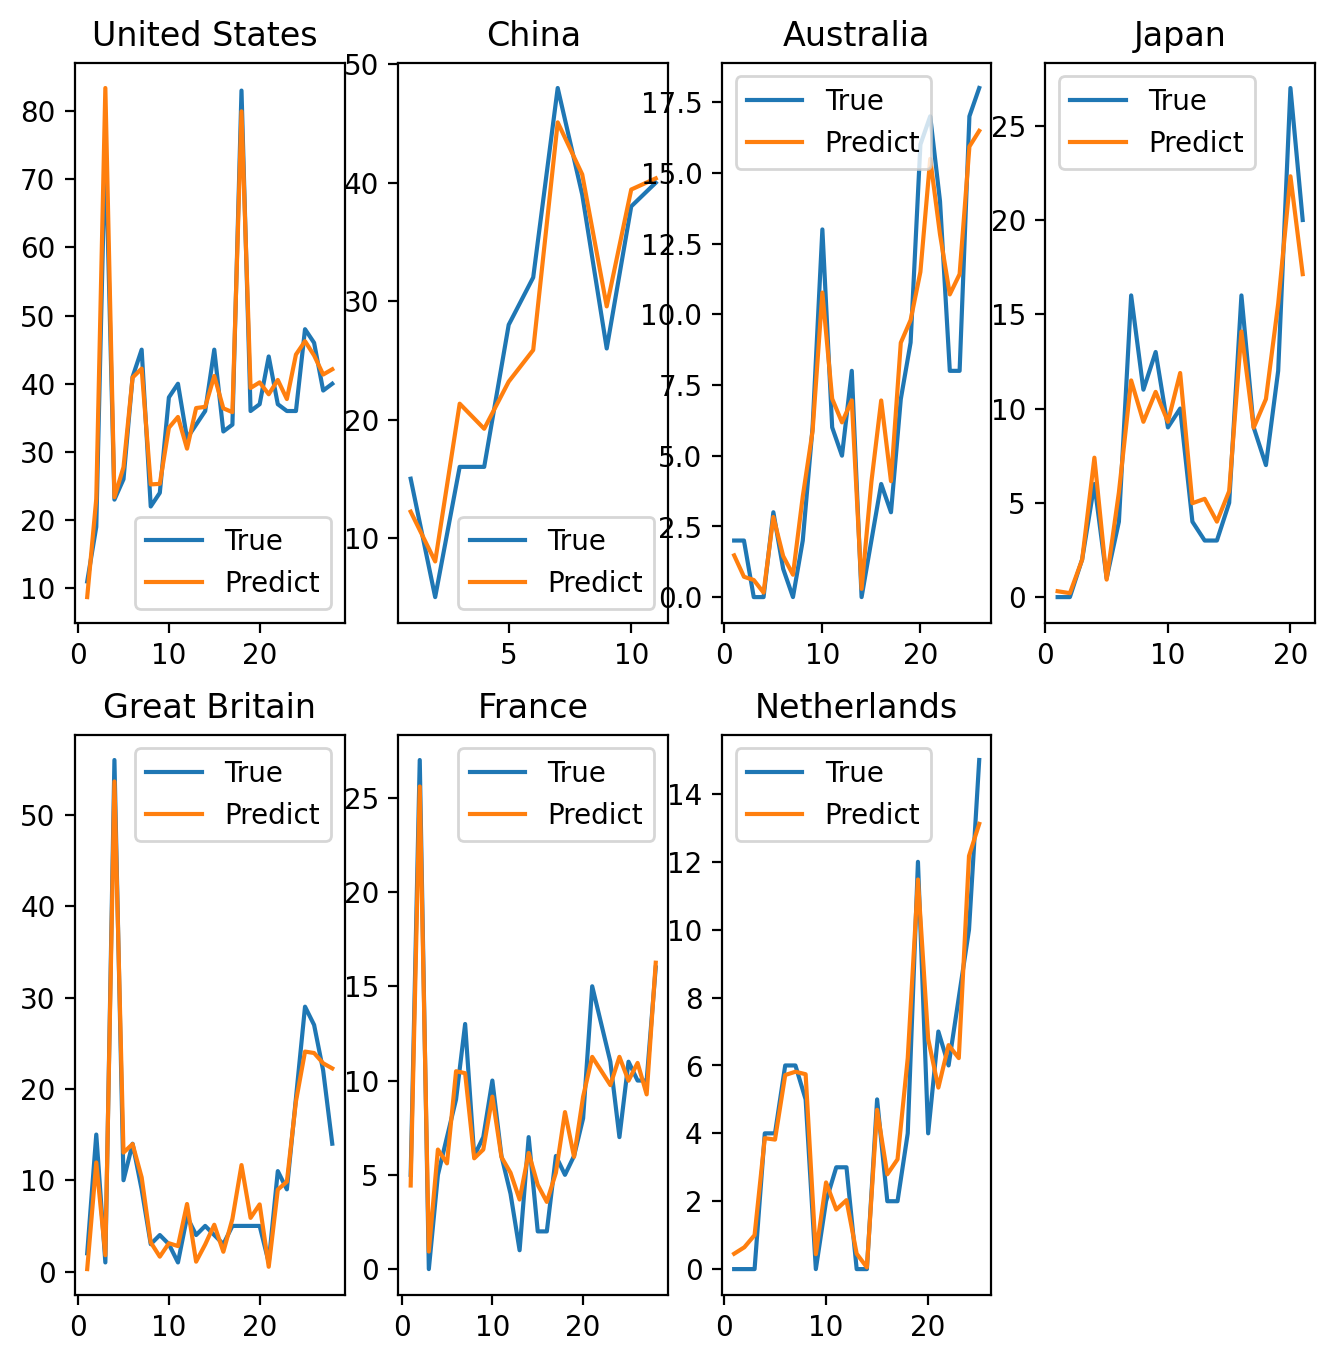

In [45]:
'''mapping the regression result of Medal Count(Gold)'''
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 280)
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",50) 
countries_used_in_essay=['United States ','China','Australia','Japan','Great Britain','France','Netherlands']
i=1
plt.figure(dpi=200,figsize=(8,8))
plt.axis('off')
for country in countries_used_in_essay:
    data=pd.read_excel("E:\OneDrive\Desktop\ElasticNets_Regression_Results.xlsx",sheet_name=country)
    plt.subplot(2,4,i),plt.plot(data['Olympic Period'],data['Gold True Value'],label='True'),plt.plot(data['Olympic Period'],data['Gold Predict Value'],label='Predict'),plt.title(f'{country}')
    plt.legend()
    i+=1